<a href="https://colab.research.google.com/github/tonyrh38/TFG/blob/main/SVR%20Wind%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building support vector regression model
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded = files.upload()
df = pd.read_csv("tfgdatos.csv", encoding='utf-8')
df

Saving tfgdatos.csv to tfgdatos (3).csv


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
X = np.empty(shape=50530)
#d = np.arange(0,505300, 10)
#X = np.row_stack(d)
i = 0
for i in range (50530):
  X[i] = i*10
len(X)

50530

In [ ]:
d = {'Date/Time': X, 'Wind Speed (m/s)': df['Wind Speed (m/s)']}
df = pd.DataFrame(data = d)

In [ ]:
df

,Date/Time,Wind Speed (m/s)
0,0.0,5.311336
1,10.0,5.672167
2,20.0,5.216037
3,30.0,5.659674
4,40.0,5.577941
...,...,...
50525,505250.0,11.404030
50526,505260.0,7.332648
50527,505270.0,8.435358
50528,505280.0,9.421366


In [ ]:
A = np.array([10.0])
A = A.reshape(1, -1)
print(A.shape)

#svr.predict(sc_X.transform(A))

sc_y.inverse_transform((svr.predict(sc_X.transform([[10.0]])).reshape(1, -1)))

(1, 1)


array([[6.48858701]])

In [ ]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values
y = y.reshape(len(y),1)
y.shape

(50530, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
y

array([[-0.53147626],
       [-0.44611545],
       [-0.55402096],
       ...,
       [ 0.20756566],
       [ 0.44082298],
       [ 0.57281963]])

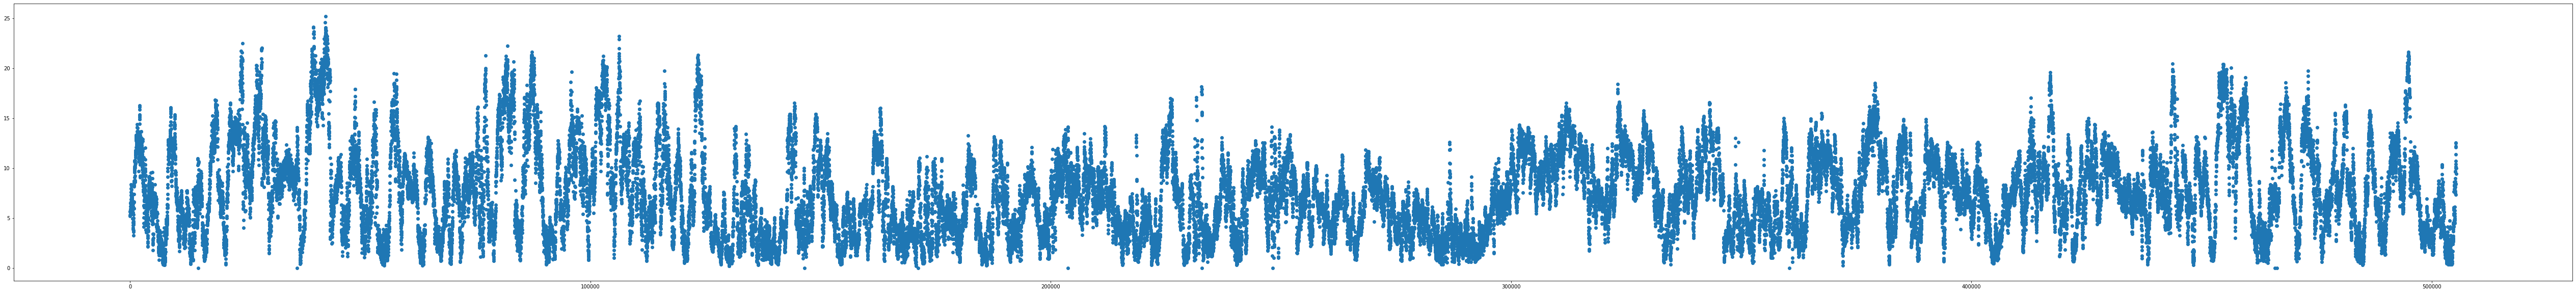

In [ ]:
plt.scatter(X,y)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (90, 10)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_test.shape

(5053, 1)

In [ ]:
from sklearn.svm import SVR
#Defino el algoritmo a utilizar
svr = SVR(kernel='rbf')
#Entreno el modelo
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#Realizo una predicción
Y_pred = svr.predict(X_test)
#Y_pred = sc_y.inverse_transform(Y_pred)

In [ ]:
X_test.size

5053

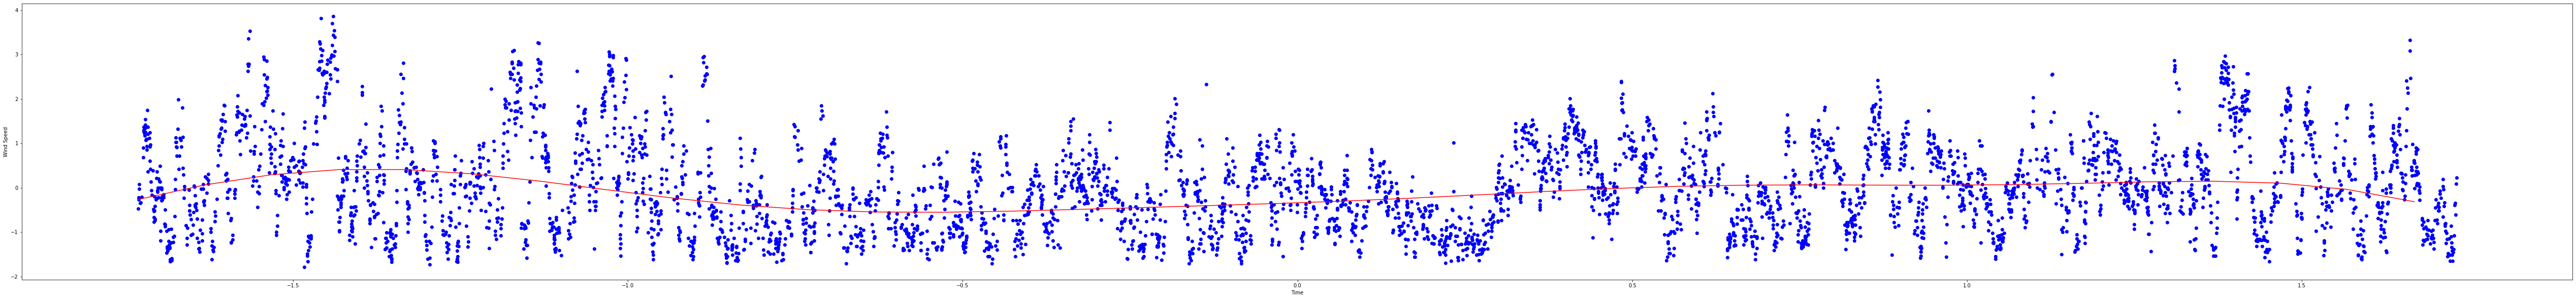

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_grid, svr.predict(X_grid), color = 'red')
#plt.plot(X_test, Y_pred, color='red')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.show()